In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

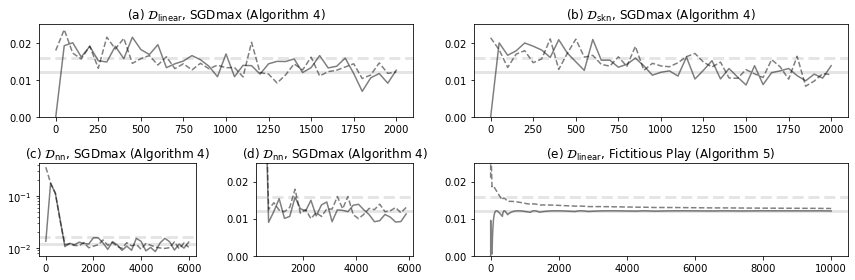

In [3]:
mu = 0.3
n = 10
r_samplemean = mu * (1 - mu) / np.sqrt(n) / (1 + np.sqrt(n))
r_Gammaminimax = mu * (1 - mu) / (1 + np.sqrt(n)) ** 2

gridsize = (2, 4)
fig = plt.figure(figsize=(12,4))
ax_linear = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax_skn = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=1)
ax_nn1 = plt.subplot2grid(gridsize, (1, 0))
ax_nn2 = plt.subplot2grid(gridsize, (1, 1))
ax_fp = plt.subplot2grid(gridsize, (1, 2), colspan=2, rowspan=1)

# ax_skn.get_yaxis().set_visible(False)
# ax_fp.get_yaxis().set_visible(False)

with open("../../../simulation/univariate_mean/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper = pickle.load(saved_file)
ax_linear.set_ylim(0, .025)
ax_linear.axhline(r_samplemean, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax_linear.axhline(r_Gammaminimax, color = (0,0,0,.1), linewidth = 3)
x_axis = np.arange(0, len(lower)+1, 50)
ax_linear.plot(x_axis, lower[::50], color = (0,0,0,.5))
ax_linear.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax_linear.set_title("(a) $\mathcal{D}_\mathrm{linear}$, SGDmax (Algorithm 4)")




with open("../../../simulation/univariate_mean_nn/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper = pickle.load(saved_file)
ax_skn.set_ylim(0, .025)
ax_skn.axhline(r_samplemean, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax_skn.axhline(r_Gammaminimax, color = (0,0,0,.1), linewidth = 3)
x_axis = np.arange(0, len(lower)+1, 50)
ax_skn.plot(x_axis, lower[::50], color = (0,0,0,.5))
ax_skn.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax_skn.set_title("(b) $\mathcal{D}_\mathrm{skn}$, SGDmax (Algorithm 4)")



with open("../../../simulation/univariate_mean_pure_nn/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper = pickle.load(saved_file)
ax_nn1.axhline(r_samplemean, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax_nn1.axhline(r_Gammaminimax, color = (0,0,0,.1), linewidth = 3)
x_axis = np.arange(0, len(lower)+1, 200)
ax_nn1.plot(x_axis, lower[::200], color = (0,0,0,.5))
ax_nn1.plot(x_axis, upper[::200], color = (0,0,0,.5), linestyle = "dashed")
ax_nn1.set_yscale("log")
ax_nn1.set_title("(c) $\mathcal{D}_\mathrm{nn}$, SGDmax (Algorithm 4)")

ax_nn2.set_ylim(0, .025)
ax_nn2.axhline(r_samplemean, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax_nn2.axhline(r_Gammaminimax, color = (0,0,0,.1), linewidth = 3)
x_axis = np.arange(500, len(lower)+1, 200)
ax_nn2.plot(x_axis, lower[500::200], color = (0,0,0,.5))
ax_nn2.plot(x_axis, upper[500::200], color = (0,0,0,.5), linestyle = "dashed")
ax_nn2.set_title("(d) $\mathcal{D}_\mathrm{nn}$, SGDmax (Algorithm 4)")




with open("../../../simulation/univariate_mean_fictitious_play/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper = pickle.load(saved_file)
ax_fp.set_ylim(0, .025)
ax_fp.axhline(r_samplemean, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax_fp.axhline(r_Gammaminimax, color = (0,0,0,.1), linewidth = 3)
# x_axis = np.arange(0, len(lower)+1, 50)
# ax_fp.plot(x_axis, lower[::50], color = (0,0,0,.5))
# ax_fp.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax_fp.plot(lower, color = (0,0,0,.5))
ax_fp.plot(upper, color = (0,0,0,.5), linestyle = "dashed")
ax_fp.set_title("(e) $\mathcal{D}_\mathrm{linear}$, Fictitious Play (Algorithm 5)")

fig.tight_layout()
plt.savefig("mean.pdf")

In [9]:
gridsize = (1, 3)
fig = plt.figure(figsize = (12,4))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

with open("../../../simulation/n_species/n_new_species/1/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, OSW_Risk, SCL_Risk = pickle.load(saved_file)
ax1.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax1.axhline(OSW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax1.axhline(SCL_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 50)
lower_line, = ax1.plot(x_axis, lower[::50], color = (0,0,0,.5))
upper_line, = ax1.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax1.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "upper right")
ax1.set_ylim(bottom = 0, top = 330)
ax1.set_xlabel("Iteration $t$")
ax1.set_title("(a) Strongly informative priors")



with open("../../../simulation/n_species/n_new_species/2/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, OSW_Risk, SCL_Risk = pickle.load(saved_file)
ax2.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax2.axhline(OSW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax2.axhline(SCL_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 50)
lower_line, = ax2.plot(x_axis, lower[::50], color = (0,0,0,.5))
upper_line, = ax2.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax2.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "upper right")
ax2.set_ylim(bottom = 0, top = 330)
ax2.set_xlabel("Iteration $t$")
ax2.set_title("(b) Weakly informative priors")



with open("../../../simulation/n_species/n_new_species/3/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, OSW_Risk, SCL_Risk = pickle.load(saved_file)
ax3.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax3.axhline(OSW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
ax3.axhline(SCL_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 50)
lower_line, = ax3.plot(x_axis, lower[::50], color = (0,0,0,.5))
upper_line, = ax3.plot(x_axis, upper[::50], color = (0,0,0,.5), linestyle = "dashed")
ax3.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "upper right")
ax3.set_ylim(bottom = 0, top = 330)
ax3.set_xlabel("Iteration $t$")
ax3.set_title("(c) Almost noninformative priors")



fig.tight_layout()
plt.savefig("n_new_species.pdf")

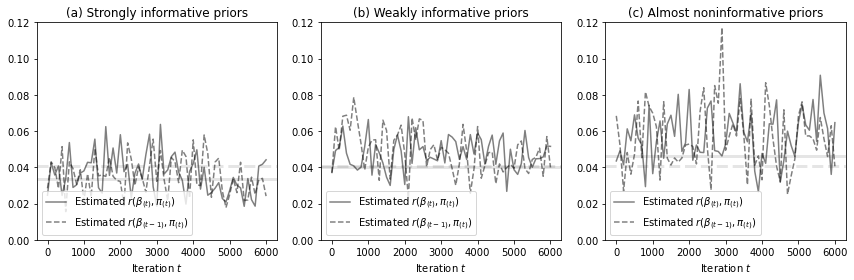

In [13]:
gridsize = (1, 3)
fig = plt.figure(figsize = (12,4))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

with open("../../../simulation/n_species/entropy/1/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, JVHW_Risk = pickle.load(saved_file)
ax1.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax1.axhline(JVHW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 100)
lower_line, = ax1.plot(x_axis, lower[::100], color = (0,0,0,.5))
upper_line, = ax1.plot(x_axis, upper[::100], color = (0,0,0,.5), linestyle = "dashed")
ax1.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "lower left")
ax1.set_ylim(bottom = 0, top = 0.12)
ax1.set_xlabel("Iteration $t$")
ax1.set_title("(a) Strongly informative priors")




with open("../../../simulation/n_species/entropy/2/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, JVHW_Risk = pickle.load(saved_file)
ax2.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax2.axhline(JVHW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 100)
lower_line, = ax2.plot(x_axis, lower[::100], color = (0,0,0,.5))
upper_line, = ax2.plot(x_axis, upper[::100], color = (0,0,0,.5), linestyle = "dashed")
ax2.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "lower left")
ax2.set_ylim(bottom = 0, top = 0.12)
ax2.set_xlabel("Iteration $t$")
ax2.set_title("(b) Weakly informative priors")




with open("../../../simulation/n_species/entropy/3/lower_upper_risk.pkl","rb") as saved_file:
    lower, upper, Gamma_minimax_Risk, JVHW_Risk = pickle.load(saved_file)
ax3.axhline(Gamma_minimax_Risk, color = (0,0,0,.1), linewidth = 3)
ax3.axhline(JVHW_Risk, color = (0,0,0,.1), linewidth = 3, linestyle = "dashed")
x_axis = np.arange(0, len(lower)+1, 100)
lower_line, = ax3.plot(x_axis, lower[::100], color = (0,0,0,.5))
upper_line, = ax3.plot(x_axis, upper[::100], color = (0,0,0,.5), linestyle = "dashed")
ax3.legend(handles = [lower_line, upper_line], labels = ["Estimated $r(\\beta_{(t)},\pi_{(t)})$","Estimated $r(\\beta_{(t-1)},\pi_{(t)})$"], loc = "lower left")
ax3.set_ylim(bottom = 0, top = 0.12)
ax3.set_xlabel("Iteration $t$")
ax3.set_title("(c) Almost noninformative priors")

fig.tight_layout()
plt.savefig("entropy.pdf")